In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras import backend as K
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
import matplotlib.pyplot as plt
ImageFile.LOAD_TRUNCATED_IMAGES = True

Using TensorFlow backend.


In [2]:
# Config
img_rows, img_cols = 224, 224
batch_size = 32
epochs = 50

ImageDataGenerator()


# Custom Dataset
train_datagen = ImageDataGenerator(
                            rescale = 1./255,
                            rotation_range=5,
                            preprocessing_function=preprocess_input,
#                             width_shift_range=5. / img_rows,
#                             height_shift_range=5. / img_cols,
                            )
test_datagen = ImageDataGenerator(
                            rescale = 1./255,
                            preprocessing_function=preprocess_input,
                            )

train_generator = train_datagen.flow_from_directory('/home/spiros/Desktop/data-processed/train',
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    color_mode="rgb", #One of "grayscale", "rgb"
    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory('/home/spiros/Desktop/data-processed/validation',
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    color_mode="rgb", #One of "grayscale", "rgb"
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory('/home/spiros/Desktop/data-processed/test',
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    color_mode="rgb", #One of "grayscale", "rgb"
    class_mode = 'categorical')

Found 18294 images belonging to 116 classes.
Found 6903 images belonging to 116 classes.
Found 6571 images belonging to 116 classes.


In [3]:
#print(vars(train_generator))
print(train_generator.class_indices)

{'aim-odontokrema': 0, 'aim-odontovourtses': 1, 'air_wick': 2, 'ajax-tzamia': 3, 'alevri-giotis': 4, 'alfa': 5, 'alouminoxarto': 6, 'anatoli-vafi-avgon': 7, 'anthos-giotis-vanilia': 8, 'ariel': 9, 'ariel-roz': 10, 'avon-care': 11, 'baby_shampoo': 12, 'baking-powder-alatini': 13, 'barilla-farfale': 14, 'barilla-spaghetini': 15, 'beckmann_katharistiko_alatwn': 16, 'beckmann_keramikes_esties': 17, 'bepanthol': 18, 'big_pen': 19, 'camel': 20, 'cheerios': 21, 'cien-cotton-buds': 22, 'cien-wet-wipes': 23, 'cif': 24, 'cif_micro_crystals': 25, 'coca-cola-zero': 26, 'colgate-stomatiko-dialuma': 27, 'cover': 28, 'cream-soap-finale': 29, 'dettol-hand-soap': 30, 'dettol-powerandfresh': 31, 'dettol_soft_on_skin': 32, 'digestive-bars': 33, 'dog-dental-sticks': 34, 'dove-deodorant': 35, 'duck': 36, 'ecofarm_oksigonouxo': 37, 'elvive_loreal': 38, 'fairy-kapsoules': 39, 'fairy-ugro': 40, 'fakes-galaxias': 41, 'farina-portokali': 42, 'fredoccino': 43, 'froutosalata': 44, 'gigantes-3alfa': 45, 'gillette-

In [4]:
training_set = train_generator.samples
validation_set = validation_generator.samples
test_set = test_generator.samples
num_classes = train_generator.num_classes

In [5]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 3)

In [6]:
model = Sequential()

# VGG-16 based model
model.add(ZeroPadding2D((1,1),input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Simpler VGG based on trials
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))
# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

# Pappas based model
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
__________

In [7]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
#     optimizer=keras.optimizers.Adadelta(),
#     optimizer=keras.optimizers.Adam(lr=0.01),
#     optimizer=keras.optimizers.RMSprop(lr=0.1),
    metrics=['accuracy']
)


In [8]:
early_stop = keras.callbacks.EarlyStopping(
    monitor   = 'val_loss',
    min_delta = 0,
    patience  = 8,
    verbose   = 1,
    mode      = 'auto'
)

history = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    workers=2,
                    use_multiprocessing=True,
                    epochs           = epochs,
                    verbose          = 1,
                    callbacks        = [early_stop]
)

Epoch 1/50
572/572 [==============================] - 296s 518ms/step - loss: 4.7085 - acc: 0.0194 - val_loss: 4.7637 - val_acc: 0.0232
Epoch 2/50
572/572 [==============================] - 281s 491ms/step - loss: 3.7085 - acc: 0.1424 - val_loss: 3.3567 - val_acc: 0.2603
Epoch 3/50
572/572 [==============================] - 279s 488ms/step - loss: 0.8078 - acc: 0.7740 - val_loss: 3.4530 - val_acc: 0.4149
Epoch 4/50
572/572 [==============================] - 279s 487ms/step - loss: 0.2376 - acc: 0.9337 - val_loss: 3.9453 - val_acc: 0.4504
Epoch 5/50
572/572 [==============================] - 278s 487ms/step - loss: 0.1003 - acc: 0.9731 - val_loss: 3.7414 - val_acc: 0.4927
Epoch 6/50
572/572 [==============================] - 278s 487ms/step - loss: 0.0692 - acc: 0.9815 - val_loss: 3.7039 - val_acc: 0.4895
Epoch 7/50
572/572 [==============================] - 278s 485ms/step - loss: 0.0588 - acc: 0.9828 - val_loss: 3.5604 - val_acc: 0.4786
Epoch 8/50
572/572 [============================

In [9]:
score = model.evaluate_generator(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.3324525229663466
Test accuracy: 0.7033936996253871


Text(0.5,1,'Accuracy Curves')

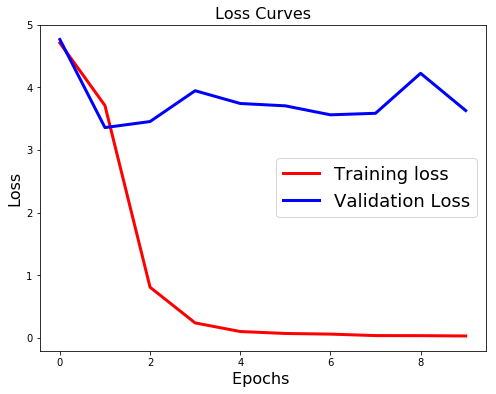

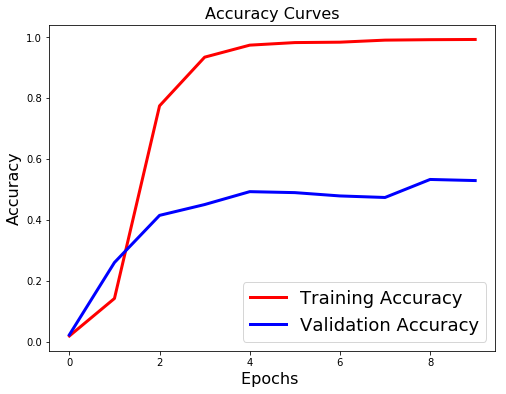

In [10]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [11]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 


Saved model to disk
